Figures to compare performances of Sync HN vs Async HN vs SOM

In [1]:
# import

import matplotlib.pyplot as plt
import pickle
import gc
import seaborn as sns
import pandas as pd
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

seed = 42
np.random.seed(seed)

In [2]:
# setting font size for graphs

SIZE = 14

plt.rc('font', size=SIZE)
plt.rc('axes', titlesize=SIZE)  
plt.rc('axes', labelsize=SIZE)  
plt.rc('xtick', labelsize=SIZE)    
plt.rc('ytick', labelsize=SIZE)  
plt.rc('legend', fontsize=SIZE) 
plt.rc('figure', titlesize=SIZE)

# set color cycle

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

In [3]:
# metrics for sync hn

with open("mse_sync.pkl", 'rb') as f:
    mse_sync = pickle.load(f)
with open("psnr_sync.pkl", 'rb') as f:
    psnr_sync = pickle.load(f)
with open("ssim_sync.pkl", 'rb') as f:
    ssim_sync = pickle.load(f)

In [4]:
# metrics for som

with open("mse_som.pkl", 'rb') as f:
    mse_som = pickle.load(f)
with open("psnr_som.pkl", 'rb') as f:
    psnr_som = pickle.load(f)
with open("ssim_som.pkl", 'rb') as f:
    ssim_som = pickle.load(f)

In [40]:
# get avg across all 10 digits

avg_mse_sync, avg_mse_som = [], []
avg_psnr_sync, avg_psnr_som = [], []
avg_ssim_sync, avg_ssim_som = [], []

for i in range(10):
    avg_mse_sync.append(mse_sync[i])
    avg_mse_som.append(mse_som[i])
    avg_psnr_sync.append(psnr_sync[i])
    avg_psnr_som.append(psnr_som[i])
    avg_ssim_sync.append(ssim_sync[i])
    avg_ssim_som.append(ssim_som[i])

avg_mse_sync = np.average(np.array(avg_mse_sync), axis=0)
avg_mse_som = np.average(np.array(avg_mse_som), axis=0)
avg_psnr_sync = np.average(np.array(avg_psnr_sync), axis=0)
avg_psnr_som = np.average(np.array(avg_psnr_som), axis=0)
avg_ssim_sync = np.average(np.array(avg_ssim_sync), axis=0)
avg_ssim_som = np.average(np.array(avg_ssim_som), axis=0)

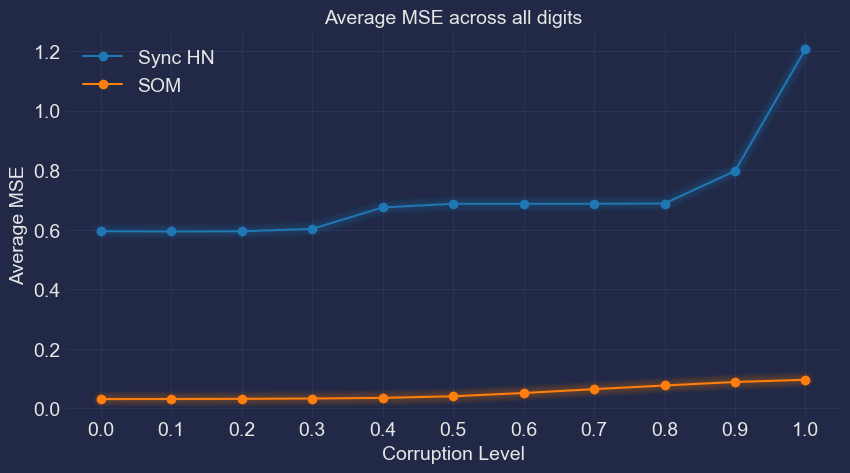

In [48]:
# avg mse

plt.figure(figsize=(10, 5))

plt.plot(np.arange(0, 1.1, 0.1), avg_mse_sync, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_mse_som, marker='o')
plt.xlabel("Corruption Level")
plt.ylabel("Average MSE")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Average MSE across all digits")
mplcyberpunk.make_lines_glow()
plt.legend(['Sync HN', 'SOM'])

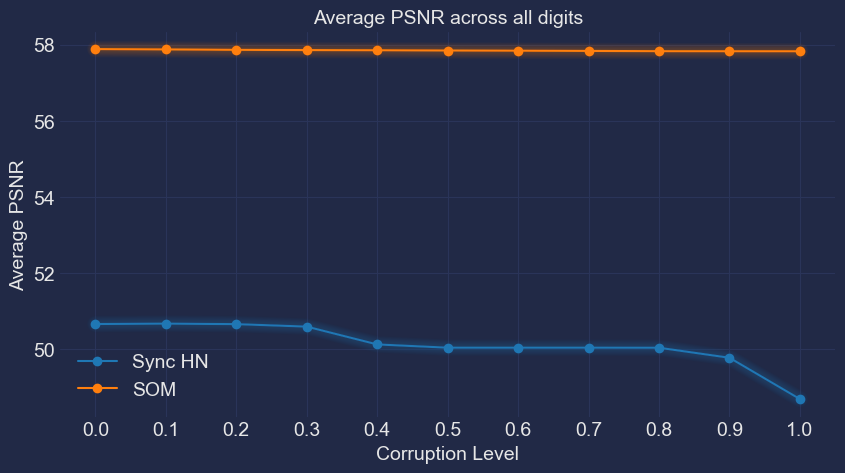

In [51]:
# avg psnr

plt.figure(figsize=(10, 5))

plt.plot(np.arange(0, 1.1, 0.1), avg_psnr_sync, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_psnr_som, marker='o')
plt.xlabel("Corruption Level")
plt.ylabel("Average PSNR")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Average PSNR across all digits")
mplcyberpunk.make_lines_glow()
plt.legend(['Sync HN', 'SOM'])

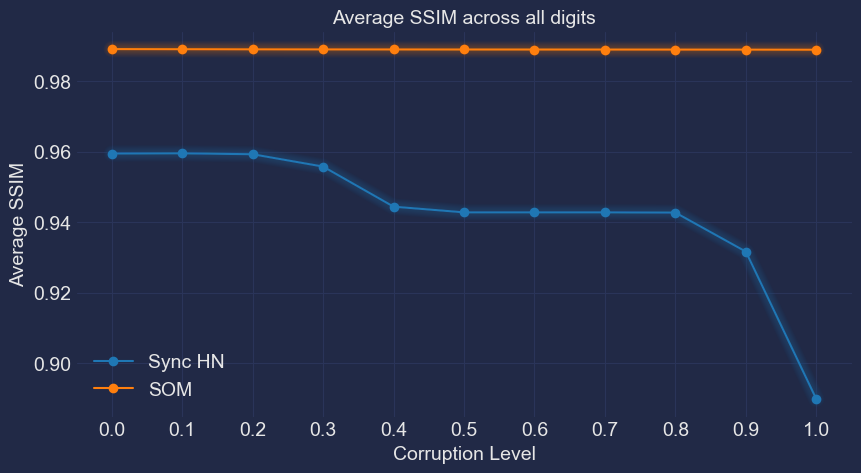

In [52]:
# avg ssim

plt.figure(figsize=(10, 5))

plt.plot(np.arange(0, 1.1, 0.1), avg_ssim_sync, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_ssim_som, marker='o')
plt.xlabel("Corruption Level")
plt.ylabel("Average SSIM")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Average SSIM across all digits")
mplcyberpunk.make_lines_glow()
plt.legend(['Sync HN', 'SOM'])

In [ ]:
gc.collect()

0